<a href="https://colab.research.google.com/github/Megha2328/Generative-AI/blob/main/Text_to_Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Mon Feb 24 23:19:12 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Text-image generation usinf diffusion model
!pip install diffusers transformers accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [4]:
!pip show torch

Name: torch
Version: 2.5.1+cu124
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.11/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, peft, sentence-transformers, timm, torchaudio, torchvision


In [6]:
# Using two models from hugging face hub
model_1="dreamlike-art/dreamlike-diffusion-1.0"
model_2="stabilityai/stable-diffusion-x1-base-1.0"

# StableDiffusionPipeline is a pipeline used for text to image generation
pipe=StableDiffusionPipeline.from_pretrained(model_1, torch_dtype=torch.float16, USE_SAFETENSORS=True)
pipe=pipe.to("cuda")

Keyword arguments {'USE_SAFETENSORS': True} are not expected by StableDiffusionPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [8]:
prompt="""A girl with long brown hair, sitting in a park, reading a book under
a tall tree, wearing a pink flowery dress with a cute bow and listening to music."""

In [9]:
# Prompt to image conversion
image=pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

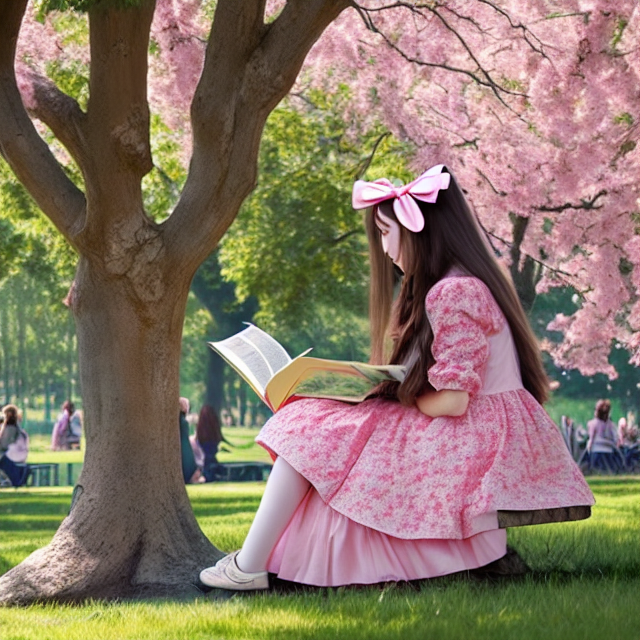

In [10]:
image

Prompt: A girl with long brown hair, sitting in a park, reading a book under 
a tall tree, wearing a pink flowery dress with a cute bow and listening to music.


(-0.5, 639.5, 639.5, -0.5)

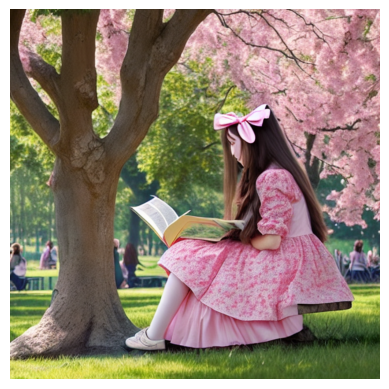

In [12]:
# Plotting the image using matplotlib
print(f"Prompt: {prompt}")
plt.imshow(image)
plt.axis('off') # When we want to remove the axes while displaying images to remove unnecessary grid lines

In [13]:
prompt2=""" A tall tree in the middle of a wide field"""

In [25]:
# Generate multiple images for a single prompt
image2=pipe(prompt2,num_images_per_prompt=3).images
image2[0].show()

  0%|          | 0/50 [00:00<?, ?it/s]

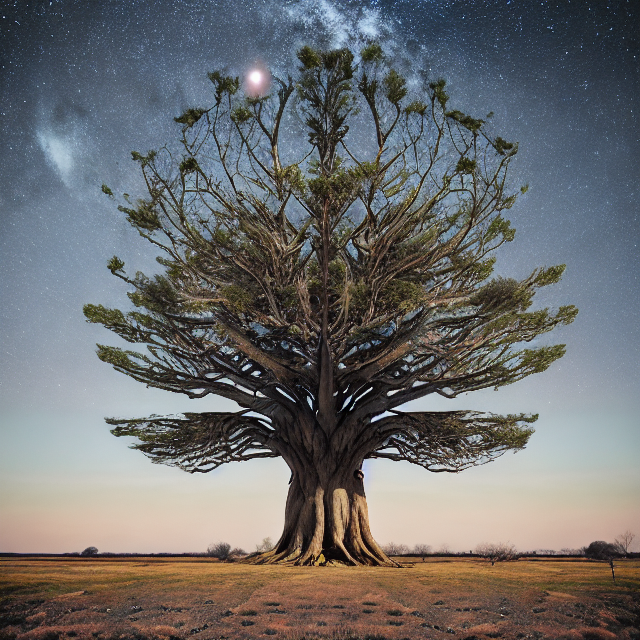

In [26]:
image2[0]

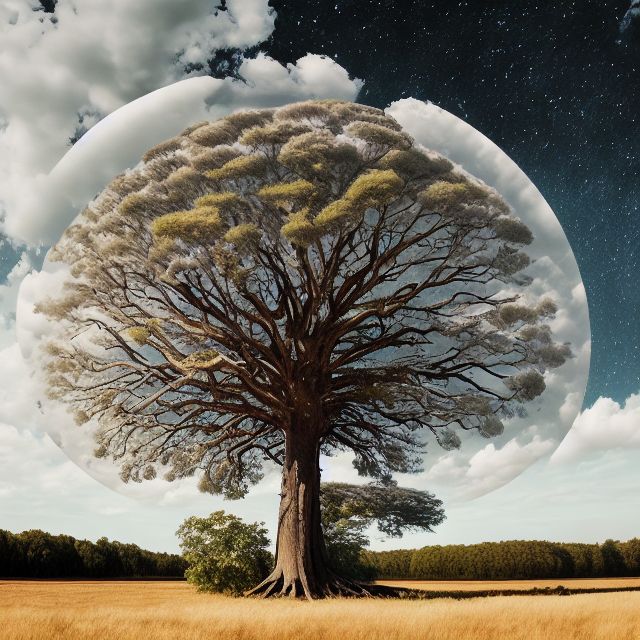

In [27]:
image2[1]

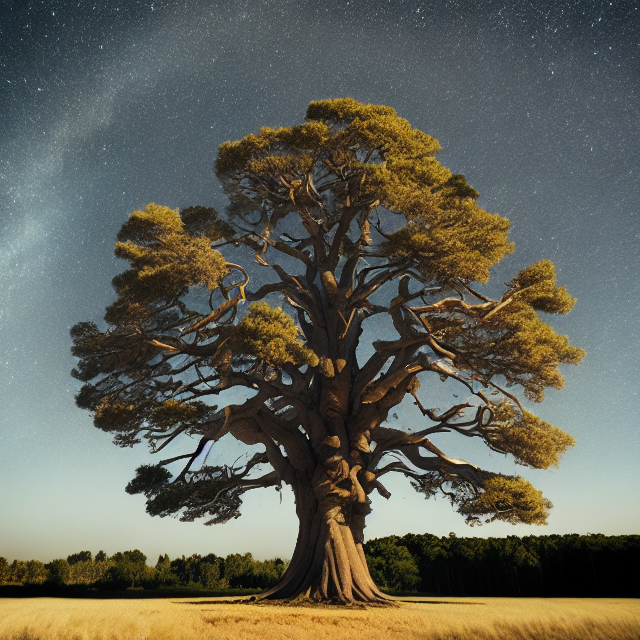

In [28]:
image2[2]

Prompt :  A tall tree in the middle of a wide field


(-0.5, 639.5, 639.5, -0.5)

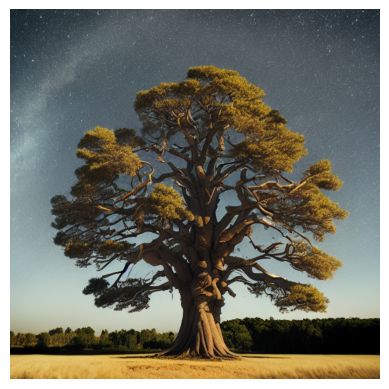

In [29]:
print(f"Prompt : {prompt2}")
plt.imshow(image2[2])
plt.axis('off')

In [31]:
# Stable Diffusion Parameters
def generate_image(pipe, prompt, params): # params are additional parameters like num_images_per_prompt, num_inference steps etc.
  img=pipe(prompt,**params).images # Generates multiple images depending upon the params
  num_images=len(img) # Stores the number of generated images
  if(num_images)>1:
    fig, ax=plt.subplots(nrows=1,ncols=num_images) # Creates a subplot with 1 row and num_images length col
    for i in range(num_images): # Iterates through every image generated and displays it.
      ax[i].imshow(img[i])
      ax[i].axis('off')
  else:               # If only one image is generated then display only that image
    fig=plt.figure()
    plt.imshow(img[0]);
    plt.axis('off')
  plt.tight_layout()

  0%|          | 0/50 [00:00<?, ?it/s]

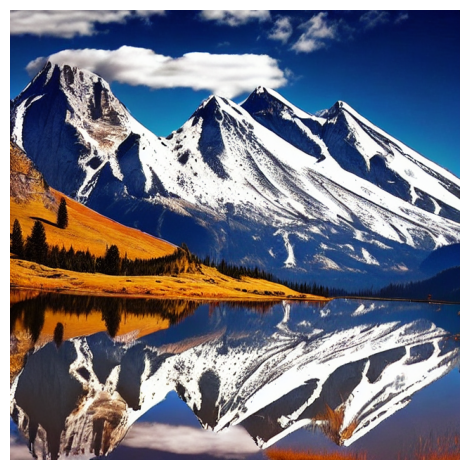

In [32]:
prompt3="a beautiful view of mountains"
params={}
generate_image(pipe,prompt3,params)

  0%|          | 0/100 [00:00<?, ?it/s]

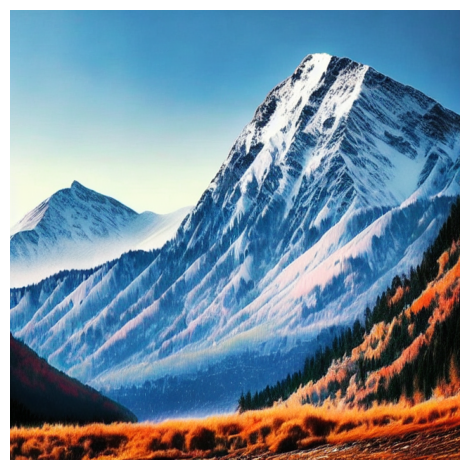

In [33]:
# num_inference steps- It basically tells us about how many refinement steps are to be taken. More the number of steps, higher is the quality of the image but slower would be its generation
params={'num_inference_steps':100}
generate_image(pipe,prompt3,params)

  0%|          | 0/100 [00:00<?, ?it/s]

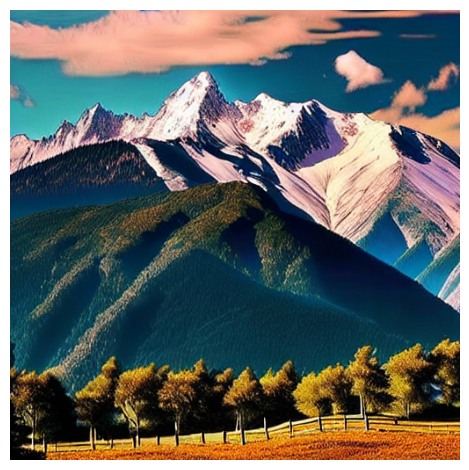

In [34]:
# Height and width of the image
params={'num_inference_steps':100, 'height':512, 'width':512}
generate_image(pipe,prompt3,params)

  0%|          | 0/100 [00:00<?, ?it/s]

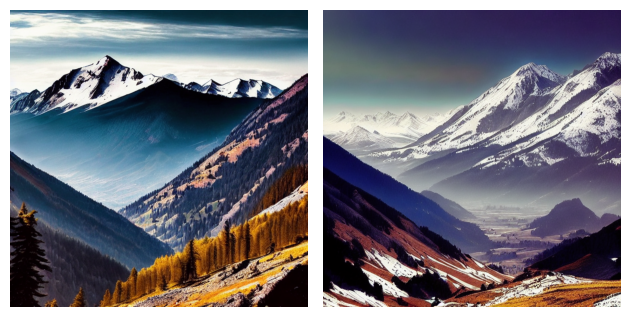

In [35]:
# num_images_per_prompt
params={'num_inference_steps':100, 'num_images_per_prompt':2}
generate_image(pipe, prompt3,params)

  0%|          | 0/100 [00:00<?, ?it/s]

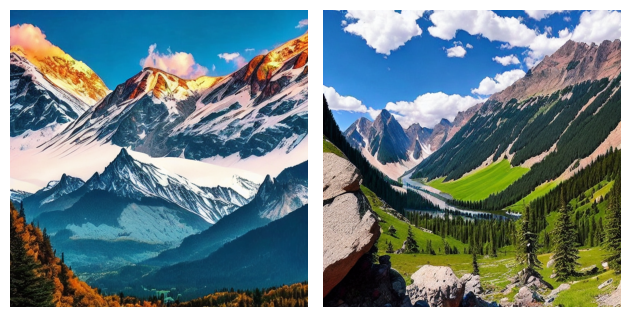

In [36]:
# negative_prompt
params={'num_inference_steps':100, 'num_images_per_prompt':2, 'negative_prompt':'blur'}
generate_image(pipe, prompt3,params)